In [1]:
from qiskit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
import bitstring
from qiskit_aer import AerSimulator

from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)

from qiskit.circuit.library import UnitaryGate

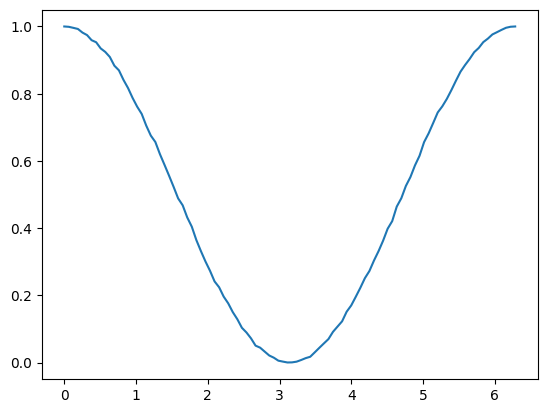

In [30]:
qr = QuantumRegister(1)

qc = QuantumCircuit(qr)

angles = np.linspace(0,2*np.pi,100)

p = []

shots = 10000

for i in angles:
    qc = QuantumCircuit(qr)

    qc.h(0)
    qc.p(i,0)
    qc.h(0)

    qc.measure_all()

    sim = AerSimulator()
    job = sim.run(qc, shots=shots)
    result = job.result()
    counts = result.get_counts()

    if "0" in counts:
        p.append(counts["0"]/shots)
    else:
        p.append(0)

plt.plot(angles,p)

#qc.draw("mpl")

0.280571830612265


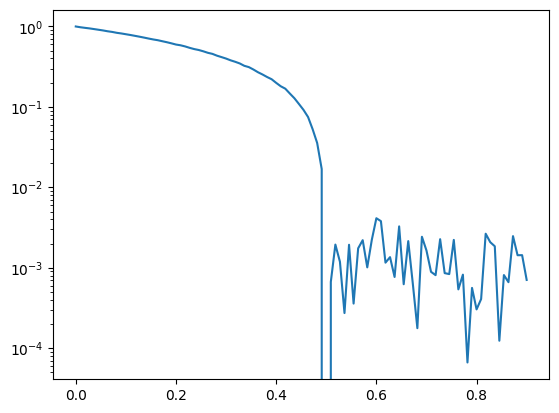

In [96]:
def skill(phi: float, shots:int, error: float):
    angle = 2*np.pi*phi
    qr = QuantumRegister(1)
    qc = QuantumCircuit(qr)

    qc.h(0)
    qc.p(angle,0)
    qc.h(0)
    qc.measure_all()

    sim = AerSimulator()
    job = sim.run(qc, shots=shots)
    result = job.result()
    counts = result.get_counts()

    p = 0

    if "0" in counts:
        p = counts["0"]/shots
    else:
        return 0.5

    hmm_1 = np.arccos(2*p-1)
    hmm_2 = 2*np.pi-hmm_1

    qr = QuantumRegister(1)
    qc = QuantumCircuit(qr)

    qc.h(0)
    qc.p(angle,0)
    qc.p(-hmm_1,0)
    qc.h(0)
    qc.measure_all()

    depolarizing_prob = error
    dep_error = depolarizing_error(depolarizing_prob, 1)
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(dep_error, ['h', "p"])  # Apply to single-qubit gates

    sim = AerSimulator()
    job = sim.run(qc, noise_model=noise_model, shots=shots)
    result = job.result()
    counts = result.get_counts()

    if "0" in counts:
        if counts["0"] >= shots*0.95:
            return hmm_1/(2*np.pi)
        else:
            return hmm_2/(2*np.pi)
    else:
        return 0.75
        

all = np.linspace(0,0.9,100)

y = []

for i in all:
    run = skill(i,10000,1)
    yes = np.abs(run-i)
    y.append(yes)

plt.plot(all,y)
plt.yscale("log")
print(np.mean(y))